In [97]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [110]:
# Konstanten
a = 4.3162774
b = 1.4916623
u0 = np.hstack([
  np.array([0,0,0]),
  np.array([-10,0,0]),
  np.array([10,0,0]),
  np.array([0,0,b]),
  np.array([0,-a,-b]),
  np.array([0,a,-b])
])

m1 = 200
m2 = 100
m3 = 100


tau = 0.01
STEPS = 10000
t0 = 0.0
t1 = tau * STEPS

t_values:  [0.000e+00 1.000e-02 2.000e-02 ... 9.998e+01 9.999e+01 1.000e+02]
u:  [[ 0.          0.          0.         ...  0.          4.3162774
  -1.4916623 ]
 [ 0.          0.          0.01491662 ... -0.0225      4.3162774
  -1.4916623 ]
 [ 0.          0.          0.02983325 ... -0.0449991   4.31618029
  -1.49160264]
 ...
 [ 0.          0.          2.44034181 ...  3.8079921  -0.25921513
   0.91938079]
 [ 0.          0.          2.431148   ...  3.80787948 -0.24794847
   0.92306608]
 [ 0.          0.          2.42191734 ...  3.80773364 -0.23667288
   0.92674039]]
u_shape:  (10000, 18)


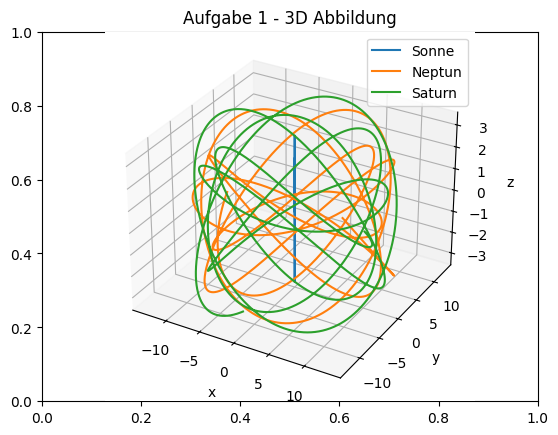

In [111]:
# Aufgabe 1
def drei_körper_problem(t0, u0):
    r1 = u0[0:3]
    r2 = u0[3:6]
    r3 = u0[6:9]
    v1 = u0[9:12]
    v2 = u0[12:15]
    v3 = u0[15:18]


    ode1 = -m2 * (r1-r2) / np.linalg.norm(r1-r2)**3 - m3 * (r1-r3) / np.linalg.norm(r1-r3)**3
    ode2 = -m3 * (r2-r3) / np.linalg.norm(r2-r3)**3 - m1 * (r2-r1) / np.linalg.norm(r2-r1)**3
    ode3 = -m1 * (r3-r1) / np.linalg.norm(r3-r1)**3 - m2 * (r3-r2) / np.linalg.norm(r3-r2)**3
    new = np.zeros(18)
    new[0:3] = v1
    new[3:6] = v2
    new[6:9] = v3
    new[9:12] = ode1
    new[12:15] = ode2
    new[15:18] = ode3
    return new


class eEuler:
    def __init__(self, fun, u0, t, tau, steps):
        self.fun = fun
        self.u0 = u0
        self.t = t
        self.tau = tau
        self.steps = steps
        self.t_list = np.linspace(t[0], t[1], steps+1)

    def call(self):
        Y = self.u0
        Y_list = [Y]
        for i in range(1,self.steps):
            Y = Y + self.tau * self.fun(self.t_list[i], Y)
            Y_list.append(Y)

        return self.t_list, np.array(Y_list)



solver = eEuler(drei_körper_problem, u0, [t0, t1], tau, STEPS)
t_values, u = solver.call()
print("t_values: ", t_values)
print("u: ", u)
print("u_shape: ", u.shape)


r1_traj = u[:, 0:3]
r2_traj = u[:, 3:6]
r3_traj = u[:, 6:9]


fig = plt.figure()
plt.title("Aufgabe 1 - 3D Abbildung")
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1_traj[:,0], r1_traj[:,1], r1_traj[:,2], label='Sonne')
ax.plot(r2_traj[:,0], r2_traj[:,1], r2_traj[:,2], label='Neptun')
ax.plot(r3_traj[:,0], r3_traj[:,1], r3_traj[:,2], label='Saturn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()


In [100]:
xx_solver = eEuler(drei_körper_problem, u0, [t0, t1], tau, STEPS)

In [101]:
# Konstanten
a = 4.3162774
b = 1.4916623
u0 = np.hstack([
  np.array([0,0,0]),
  np.array([-10,0,0]),
  np.array([10,0,0]),
  np.array([0,0,b]),
  np.array([0,-a,-b]),
  np.array([0,a,-b])
])

m1 = 200
m2 = 100
m3 = 100

tau = 0.01
STEPS = 10000
t0 = 0.0
t1 = tau * STEPS

In [102]:
def vorwärts_euler(F, t0, u0, tau):
    return u0 + tau * F(t0, u0)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs
1
uuuuu:  10001
[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.

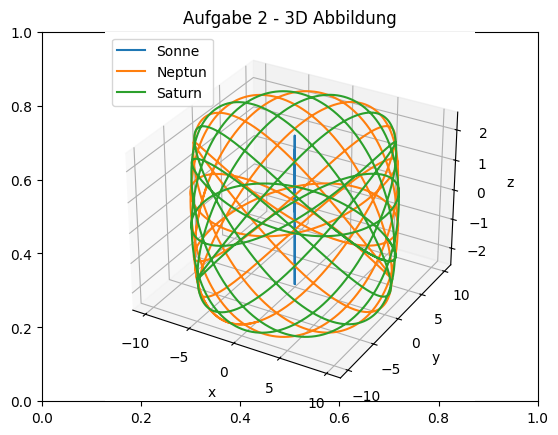

In [107]:
%time
# Aufgabe 2
def adams_bashforth(F, t0, u0, tau, steps):
    t = [t0]
    u = [u0]
    print(len(u))
    t1 = t0 + tau
    u_new = vorwärts_euler(F, t0, u0, tau)
    #eEuler_solver = eEuler(F, t0, u0, tau, steps)
    #t_values, Y = eEuler_solver.call()
    #print("u1______: ", Y)

    u.append(u_new)
    t.append(t1)

    for k in range(1, steps):
        u_next = u[k] + tau * (3/2 * F(t[k], u[k]) - 1/2 * F(t[k-1], u[k-1]))
        t_next = t[k] + tau
        u.append(u_next)
        t.append(t_next)
    print("uuuuu: ", len(u))
    return t, np.array(u)

t, u = adams_bashforth(drei_körper_problem, t0, u0=u0, tau=tau, steps=STEPS)
print(t)


r1_traj = u[:, 0:3]
r2_traj = u[:, 3:6]
r3_traj = u[:, 6:9]


fig = plt.figure()
plt.title("Aufgabe 2 - 3D Abbildung")
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1_traj[:,0], r1_traj[:,1], r1_traj[:,2], label='Sonne')
ax.plot(r2_traj[:,0], r2_traj[:,1], r2_traj[:,2], label='Neptun')
ax.plot(r3_traj[:,0], r3_traj[:,1], r3_traj[:,2], label='Saturn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

In [108]:
# Konstanten
a = 4.3162774
b = 1.4916623
u0 = np.hstack([
  np.array([0,0,0]),
  np.array([-10,0,0]),
  np.array([10,0,0]),
  np.array([0,0,b]),
  np.array([0,-a,-b]),
  np.array([0,a,-b])
])

m1 = 200
m2 = 100
m3 = 100

tau = 0.01
STEPS = 10000
t0 = 0.0
t1 = tau * STEPS

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


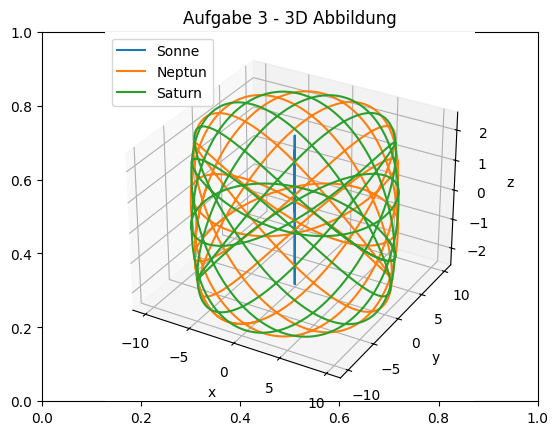

(10001, 18)

In [114]:
# Aufgabe 3
%time
def symplektisch_drei_körper_problem(tau, u0):
    r1 = u0[0:3]
    r2 = u0[3:6]
    r3 = u0[6:9]
    v1 = u0[9:12]
    v2 = u0[12:15]
    v3 = u0[15:18]

    ode1 = -m2 * ((r1-r2) / np.linalg.norm(r1-r2)**3) - m3 * ((r1-r3) / np.linalg.norm(r1-r3)**3)
    ode2 = -m3 * ((r2-r3) / np.linalg.norm(r2-r3)**3) - m1 * ((r2-r1) / np.linalg.norm(r2-r1)**3)
    ode3 = -m1 * ((r3-r1) / np.linalg.norm(r3-r1)**3) - m2 * ((r3-r2) / np.linalg.norm(r3-r2)**3)

    v1_new = v1 + tau * ode1
    v2_new = v2 + tau * ode2
    v3_new = v3 + tau * ode3

    r1_new = r1 + tau * v1_new
    r2_new = r2 + tau * v2_new
    r3_new = r3 + tau * v3_new

    u_new = np.hstack([r1_new, r2_new, r3_new, v1_new, v2_new, v3_new])
    return u_new

def symplektischer_euler(u0, tau, steps):
    u = np.zeros((steps+1, len(u0)))
    u[0] = u0
    for i in range(steps):
        u[i+1] = symplektisch_drei_körper_problem(tau, u[i])
    return u

u = symplektischer_euler(u0, tau, steps=STEPS)


r1_traj = u[:, 0:3]
r2_traj = u[:, 3:6]
r3_traj = u[:, 6:9]


fig = plt.figure()
plt.title("Aufgabe 3 - 3D Abbildung")
ax = fig.add_subplot(111, projection='3d')
ax.plot(r1_traj[:,0], r1_traj[:,1], r1_traj[:,2], label='Sonne')
ax.plot(r2_traj[:,0], r2_traj[:,1], r2_traj[:,2], label='Neptun')
ax.plot(r3_traj[:,0], r3_traj[:,1], r3_traj[:,2], label='Saturn')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

u.shape